In [1]:
import numpy as np

In [2]:
def entropy(prob):
    e = 0
    for p in prob:
        if p > 0:
            e += -1*(p*np.log2(p))
    return e

In [3]:
def entropy_counts(counts):
    c = np.asarray(counts)
    p = c/np.sum(c)
    return entropy(p)

In [4]:
def expected_split_entropy(leaves):
    leaves = np.asarray(leaves)
    entropies = np.asarray(list(map(entropy_counts, leaves)))
    sums = np.sum(leaves, axis=1)
    probs = sums/np.sum(sums)
    return np.sum(probs*entropies)

In [5]:
def information_gain(root, leaves):
    e_root = entropy_counts(root)
    e_leaves = expected_split_entropy(leaves)
    return e_root - e_leaves

In [6]:
expected_split_entropy([[2, 2], [1, 0]])

0.8

In [7]:
information_gain([4, 5], [[4, 1], [0, 4]])

0.5900048960119098

In [28]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz

In [85]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=1./3, random_state=42)

In [86]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=None)
clf = clf.fit(X_train, y_train)

In [87]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.98


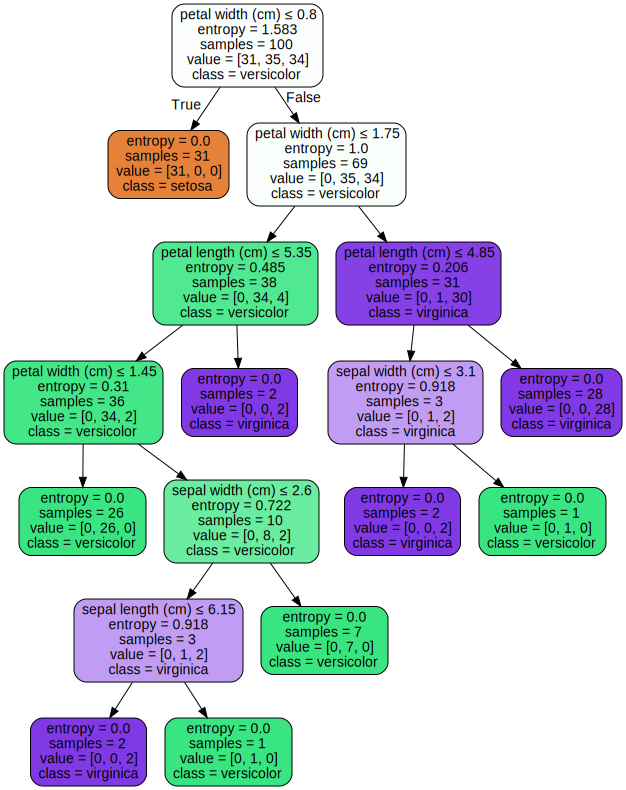

In [88]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [94]:
entropy_counts([5, 9])

0.9402859586706311

In [102]:
information_gain([3, 2], [[0, 2], [3, 0]])

0.9709505944546686

In [93]:
9.71/14

0.6935714285714286